In [34]:
import pickle
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plot_utills import *

In [2]:
with open('data/data_with_cluster.pkl', 'rb') as file:
        list_offense = pickle.load(file)

In [4]:
list_offense[0].__dir__()

['match_id',
 'id',
 'index',
 'play_pattern',
 'end_location',
 'outcome',
 'list_coords',
 'list_action_type',
 'list_time',
 'index_in_current_list',
 'clusters_centroid_kmeans',
 'dbscan_is_outlier',
 'clusters_centroid_hierarchical',
 '__module__',
 '__init__',
 'print_offense',
 'plot_offense',
 '__dict__',
 '__weakref__',
 '__doc__',
 '__new__',
 '__repr__',
 '__hash__',
 '__str__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__eq__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__reduce_ex__',
 '__reduce__',
 '__subclasshook__',
 '__init_subclass__',
 '__format__',
 '__sizeof__',
 '__dir__',
 '__class__']

# invistigate dbscan

In [6]:
outlier = []
not_outlier = []
for offense in list_offense:
    if off

1

In [9]:
outlier = []
not_outlier = []
for offense in list_offense:
    if offense.dbscan_is_outlier == -1:
        outlier.append(offense.index_in_current_list)
    else:
        not_outlier.append(offense.index_in_current_list)

In [11]:
print("outlier length: ", len(outlier))
print("not outlier length: ", len(not_outlier))

outlier length:  33494
not outlier length:  30378


In [26]:
filtered_outlier = [num for num in outlier if num < 6000]
filtered_not_outlier = [num for num in not_outlier if num < 6000]

outlier_sample = random.sample(filtered_outlier, 16)
not_outlier_sample = random.sample(filtered_not_outlier, 16)
outlier_sample = [list_offense[idx] for idx in outlier_sample]
not_outlier_sample = [list_offense[idx] for idx in not_outlier_sample]



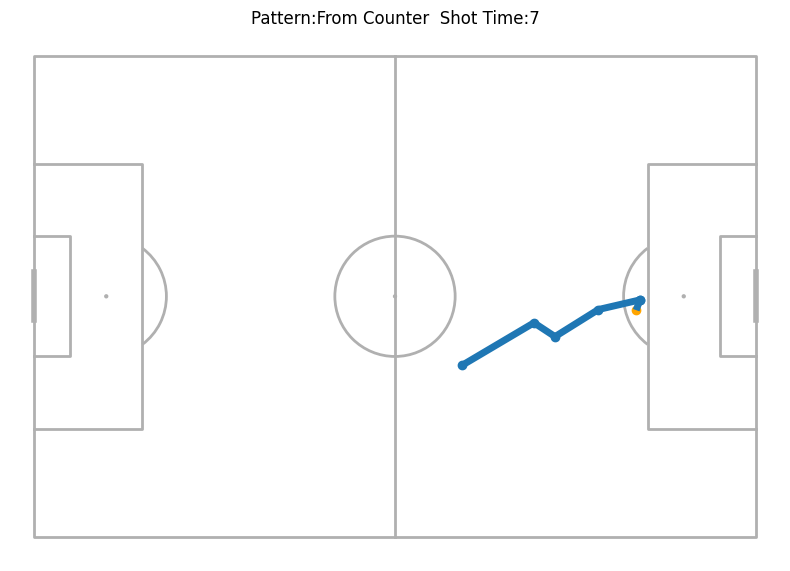

In [27]:
list_offense[380].plot_offense()

outliers


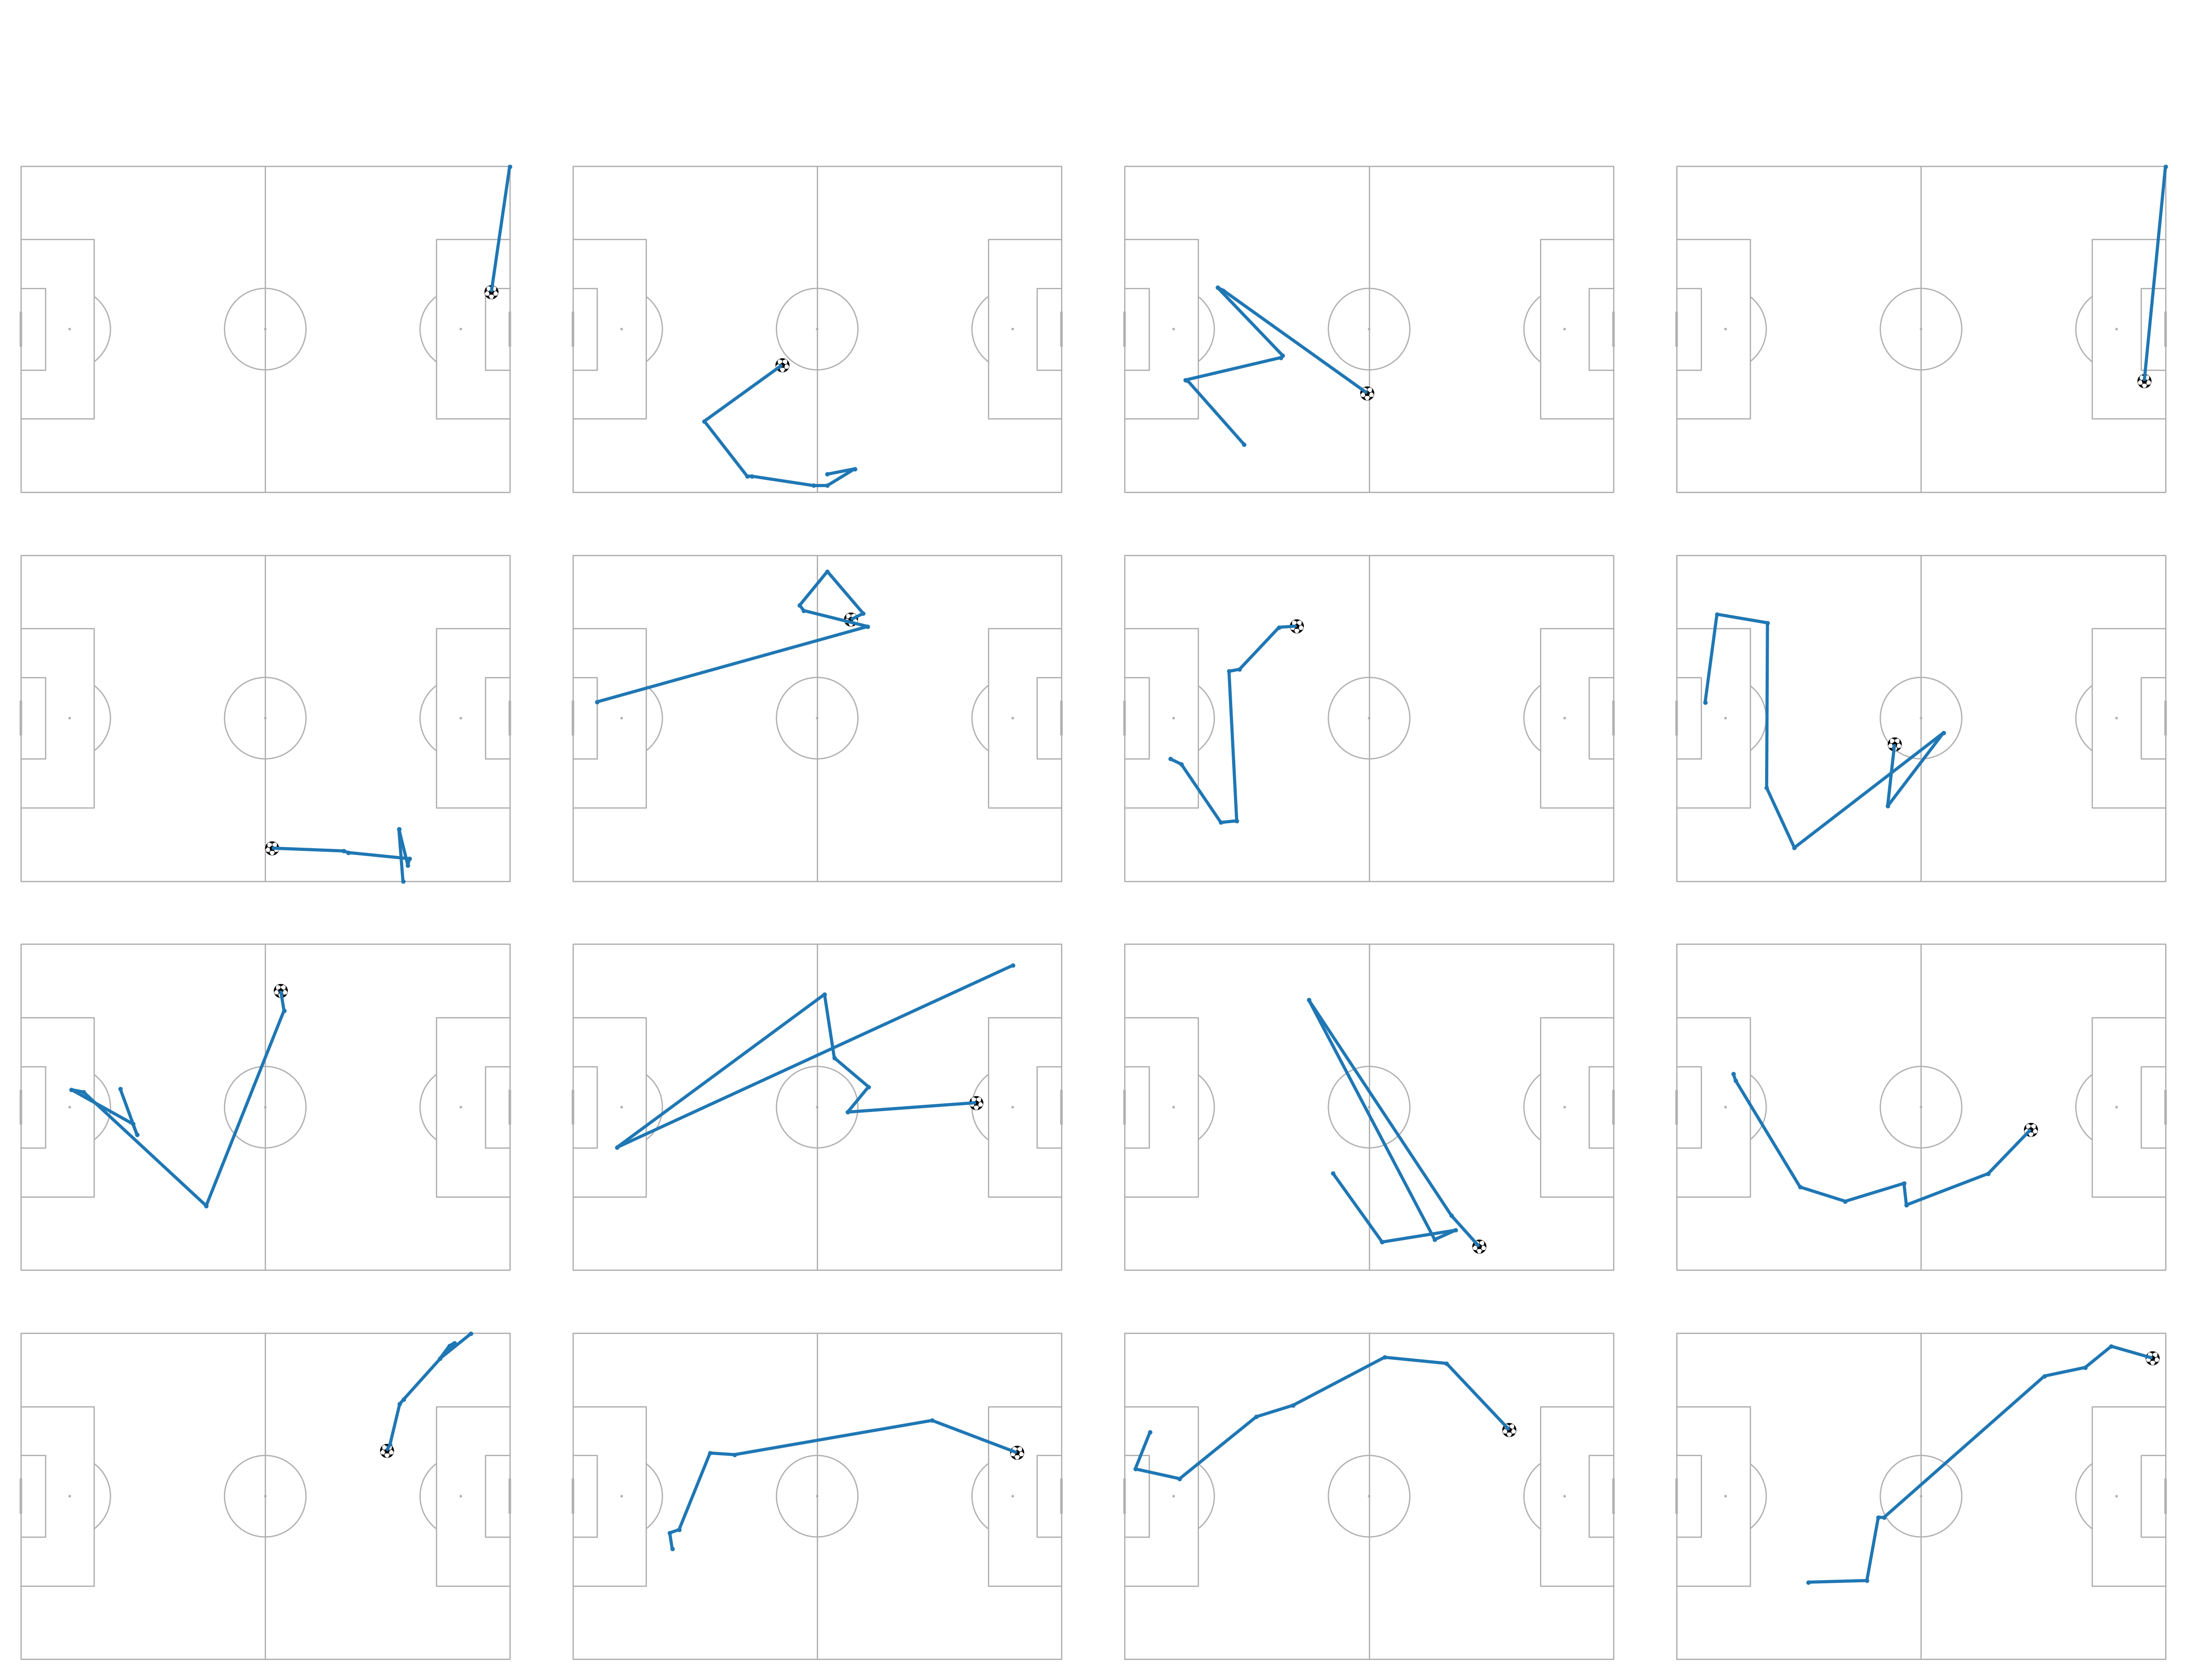

In [28]:
print("outliers")
offense_grid(outlier_sample)

not outliers


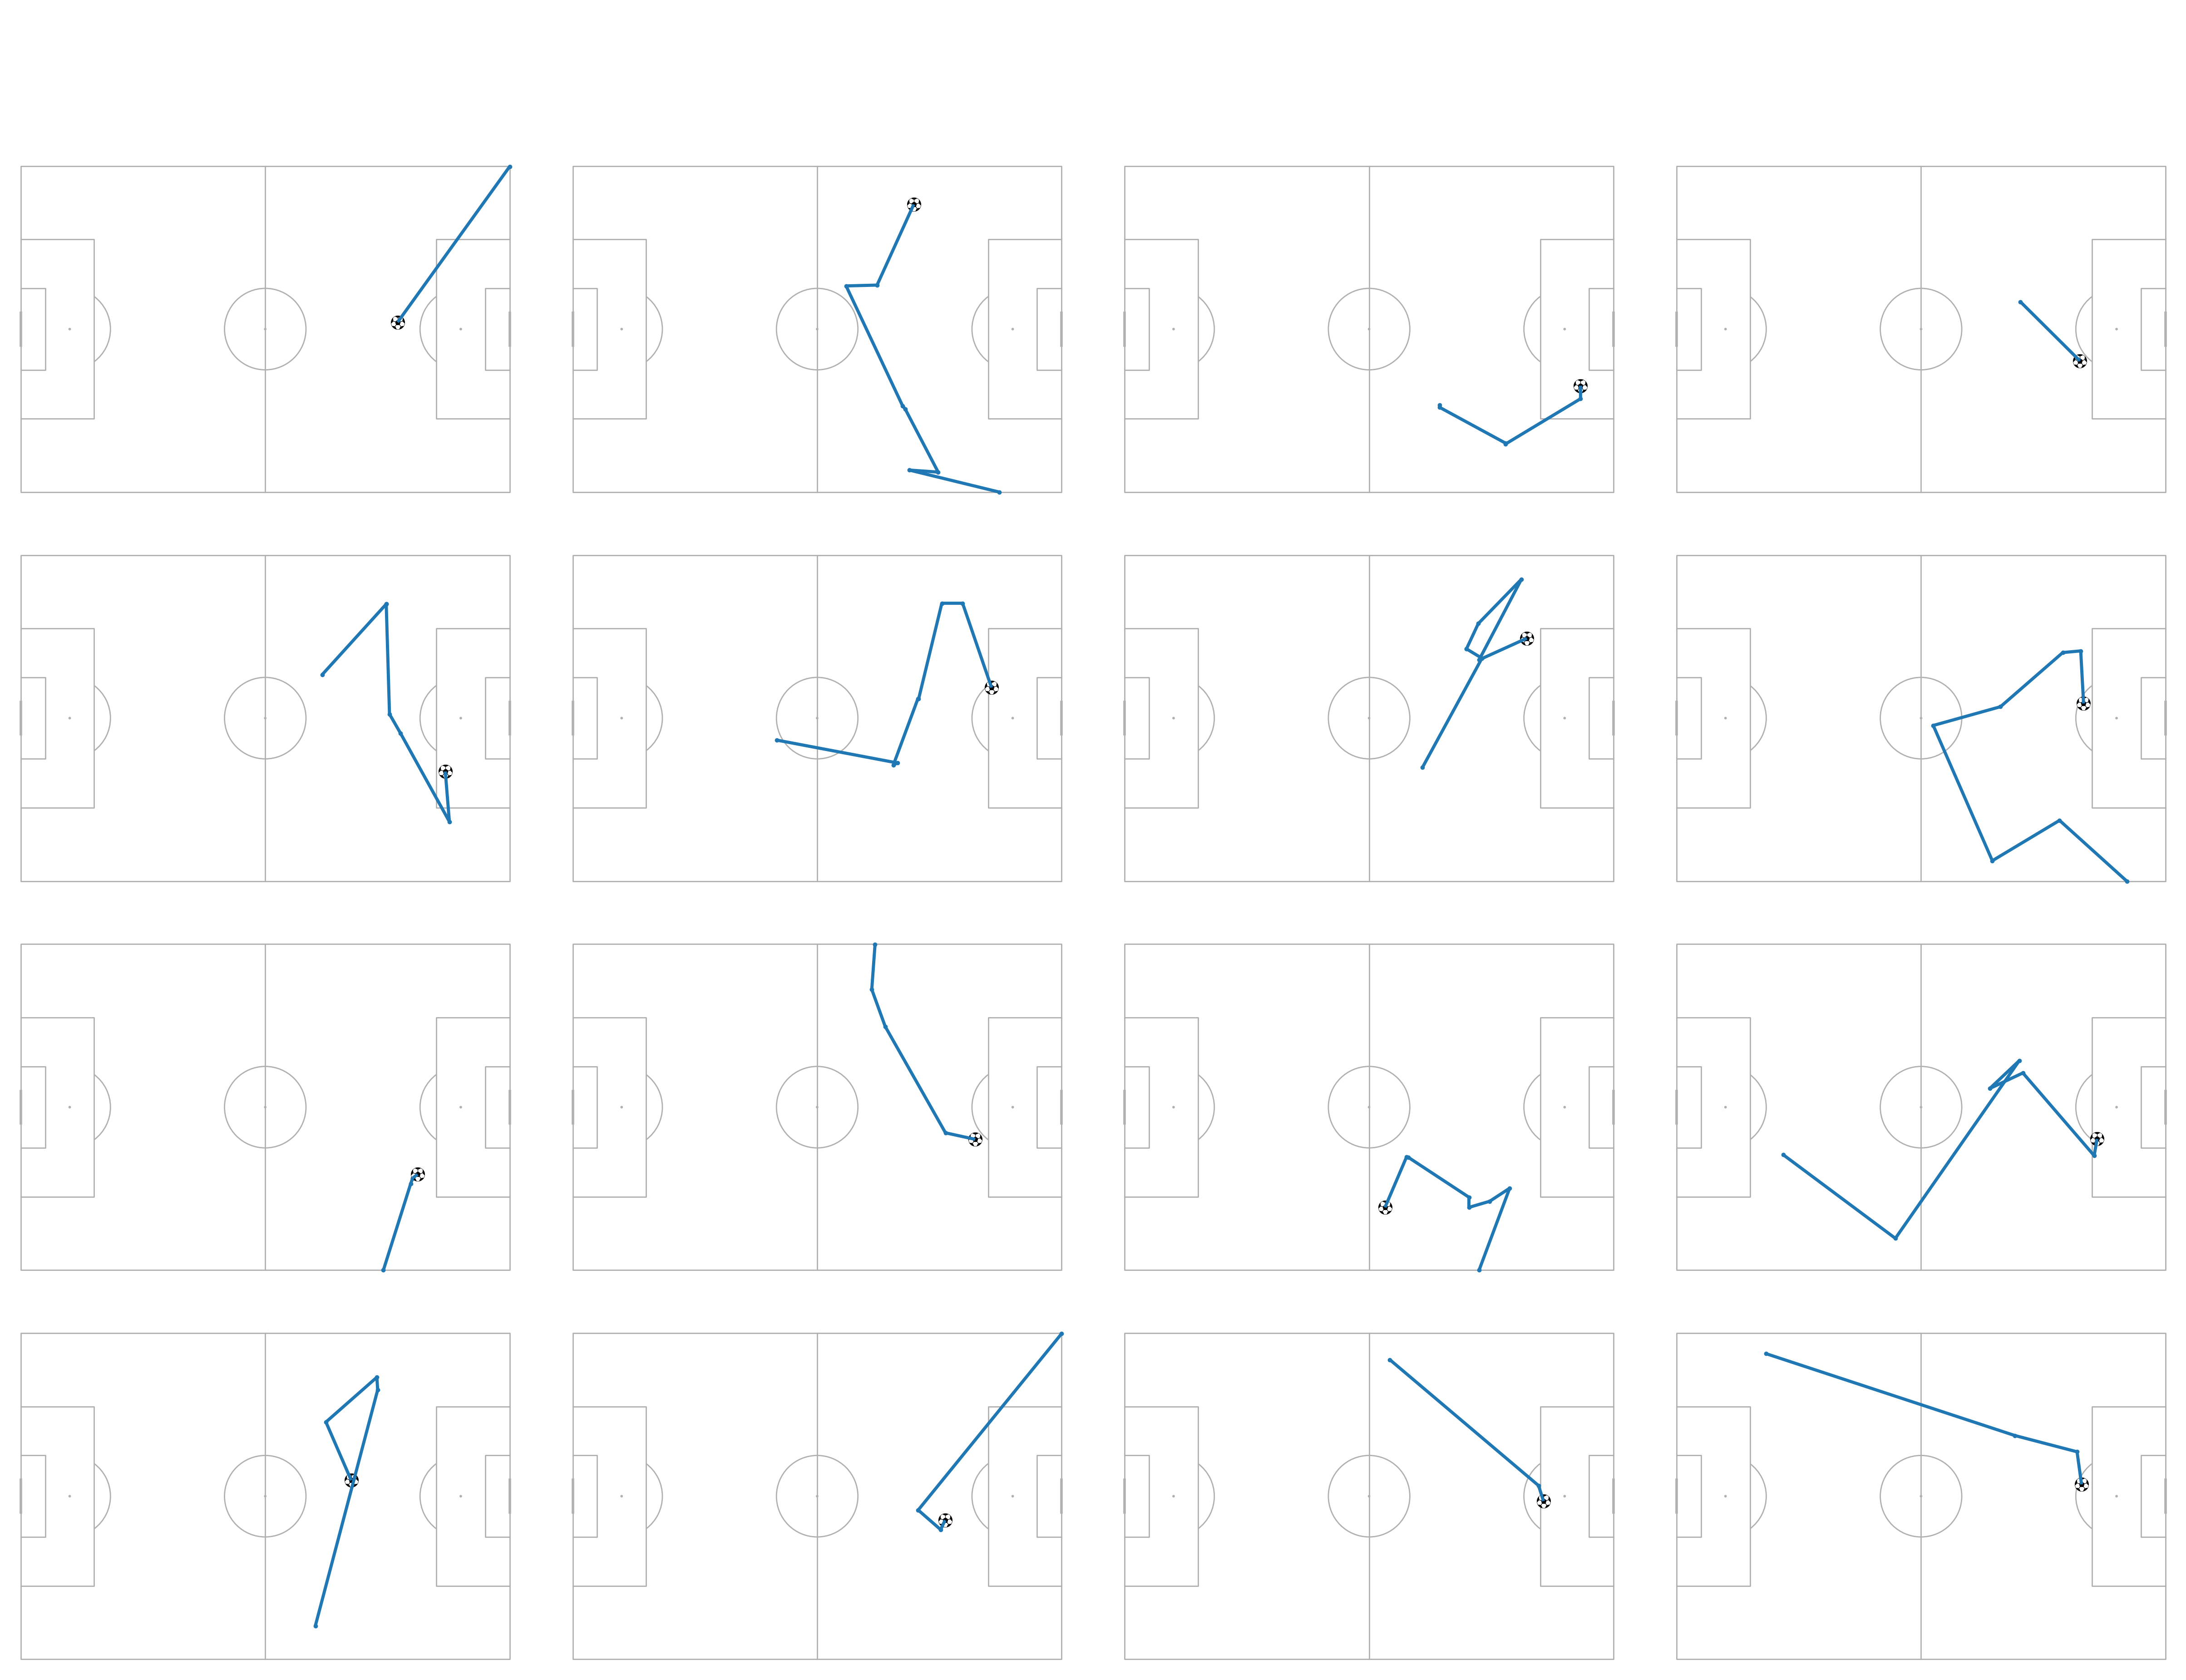

In [29]:
print("not outliers")
offense_grid(not_outlier_sample)

In [77]:
data = []

# Iterate through the list of Offense objects and extract the desired statistics
for offense in list_offense:
    if offense.list_coords[-1][0] < 60:
        d= offense.list_coords[-1][0]
    else:
        d = 120 - offense.list_coords[-1][0]
    c =0 
    p = 0
    dribble = 0
    for a in offense.list_action_type:
        if a == "Carry":
            c +=1
        elif a == "Pass":
            p += 1
        elif a == "Dribble":
            dribble += 1
    if offense.list_time[-1] < 0:
        s_t = 0
    else:
        s_t = offense.list_time[-1]
    if offense.dbscan_is_outlier == -1:
        outlier = True
    else:
        outlier = False
    data.append({
        'play_pattern': offense.play_pattern,
        'end_location': offense.end_location,
        'outcome': offense.outcome,
        'len_offense': len(offense.list_coords),
        'shot_distance': d,
        "carry" : c ,
        "pass" : p,
        "dribble" : dribble,
        'shot_time': s_t,
        "outlier" : outlier
    })

# Create a DataFrame from the collected data
df = pd.DataFrame(data)

In [78]:
df.head()

,play_pattern,end_location,outcome,len_offense,shot_distance,carry,pass,dribble,shot_time,outlier
0,Regular Play,"[120.0, 35.2, 1.0]",Off T,8,19.4,4,4,0,14,False
1,From Throw In,"[120.0, 39.3, 0.5]",Goal,4,9.1,1,2,0,6,False
2,From Throw In,"[118.1, 30.2]",Blocked,8,14.6,4,4,0,5,True
3,From Counter,"[120.0, 39.0, 0.2]",Goal,8,18.2,4,2,1,22,True
4,Regular Play,"[118.8, 36.0, 0.2]",Saved,8,41.6,3,5,0,14,True


In [79]:
df['is_goal'] = df['outcome'].apply(lambda x: 1 if x == 'Goal' else 0)


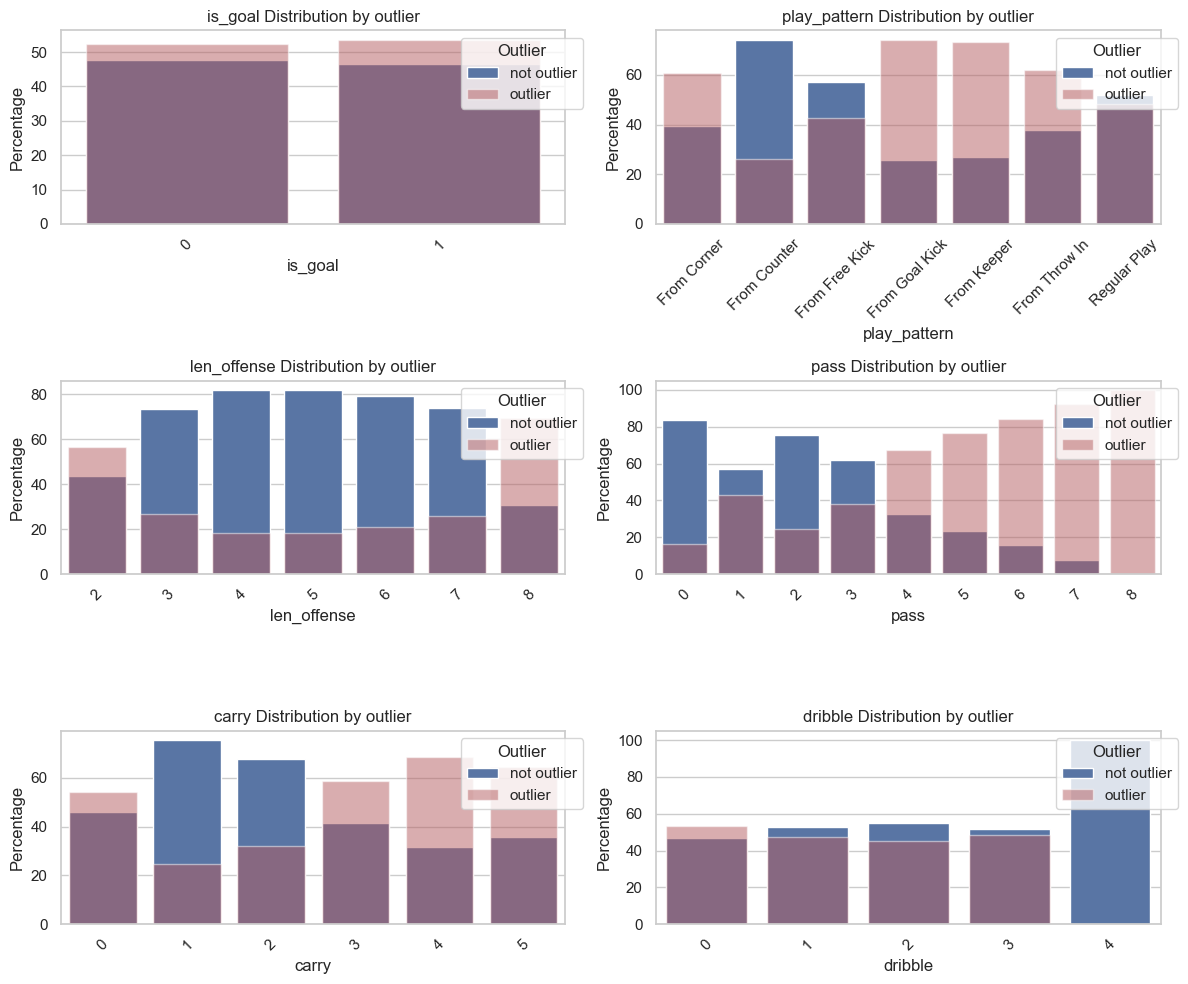

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
columns = ['is_goal', "play_pattern", "len_offense", "pass", "carry", "dribble"]
spots = [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2,1)]

for c, s in zip(columns, spots):
    # Calculate percentage values for each option within 'is_goal' groups
    percentages = df.groupby([c, 'outlier']).size().unstack('outlier').reset_index()
    percentages.fillna(0, inplace=True)
    total_per_option = percentages[0] + percentages[1]
    percentages[0] = (percentages[0] / total_per_option) * 100
    percentages[1] = (percentages[1] / total_per_option) * 100

    # Plot the bar plots side by side
    sns.barplot(x=c, y=0, data=percentages, ax=axes[s[0], s[1]], color='b', label='not outlier')
    sns.barplot(x=c, y=1, data=percentages, ax=axes[s[0], s[1]], color='r', label='outlier', alpha=0.5)

    axes[s[0], s[1]].set_title(f'{c} Distribution by outlier')
    axes[s[0], s[1]].set_ylabel('Percentage')
    axes[s[0], s[1]].set_xlabel(c, ha='center')
    # Reformat x-axis labels to be horizontal
    for tick in axes[s[0], s[1]].get_xticklabels():
        tick.set_rotation(45)

    # Set the legend outside the plot
    axes[s[0], s[1]].legend(loc='upper right', bbox_to_anchor=(1.05, 1), title='Outlier')

# Adjust layout
plt.tight_layout()
plt.show()


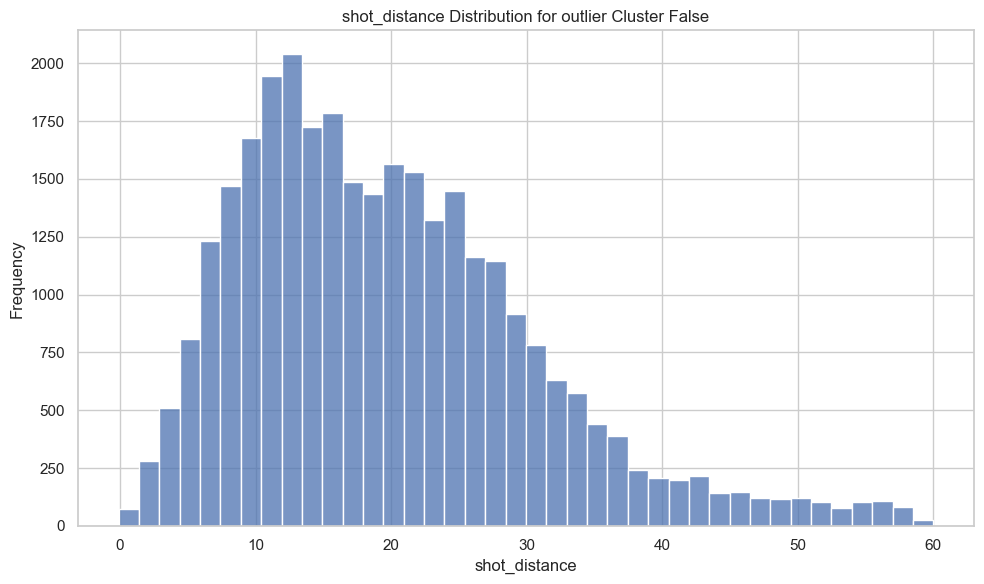

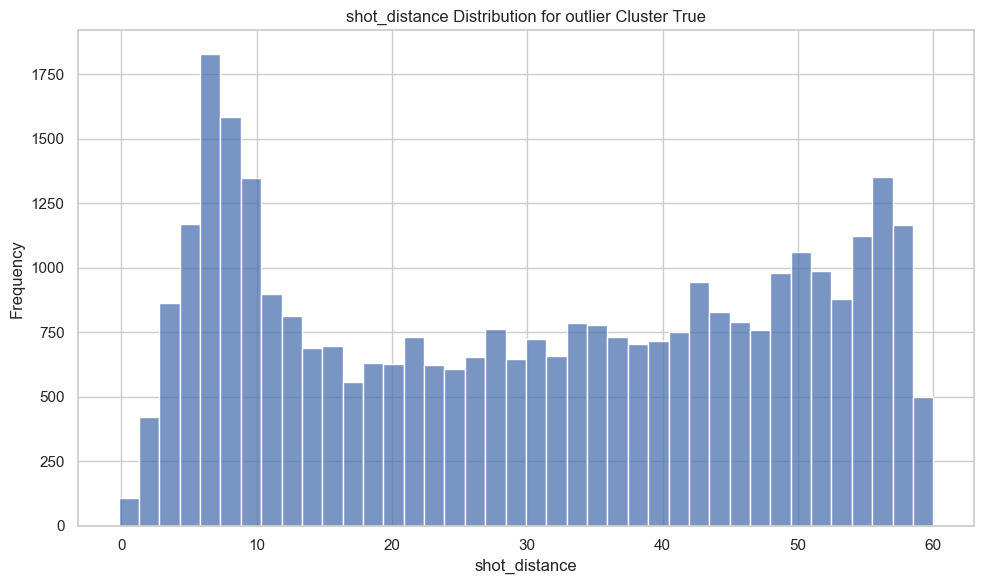

In [82]:

unique_clusters = df['outlier'].unique()
for cluster in unique_clusters:
    plt.figure(figsize=(10, 6))
    cluster_df = df[df['outlier'] == cluster]
    
    sns.histplot(data=cluster_df, x="shot_distance", bins=40)
    
    plt.title(f'shot_distance Distribution for outlier Cluster {cluster}')
    plt.ylabel('Frequency')
    plt.xlabel("shot_distance")
    plt.tick_params(axis='x', rotation=0)
    
    # Show the histogram
    plt.tight_layout()
    plt.show()




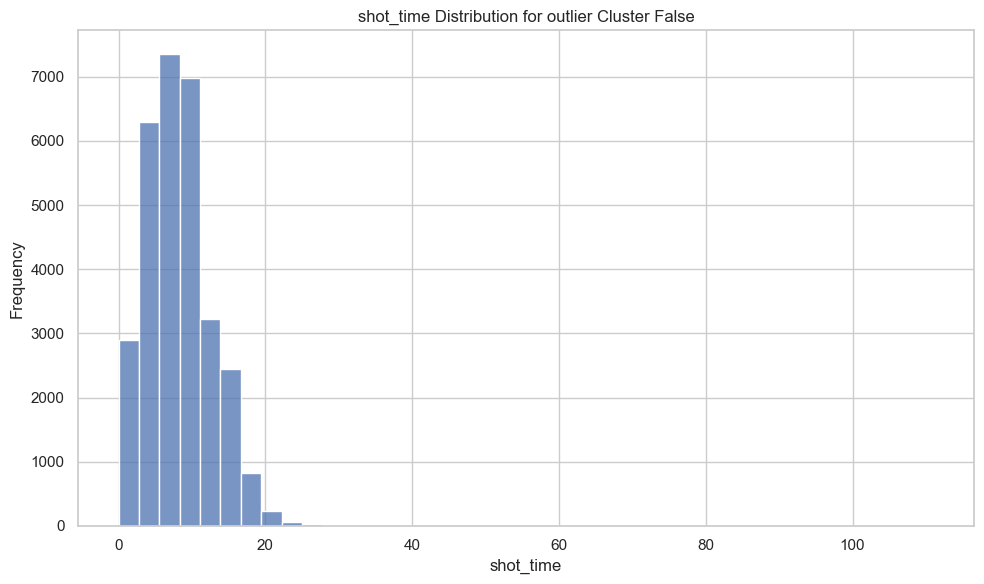

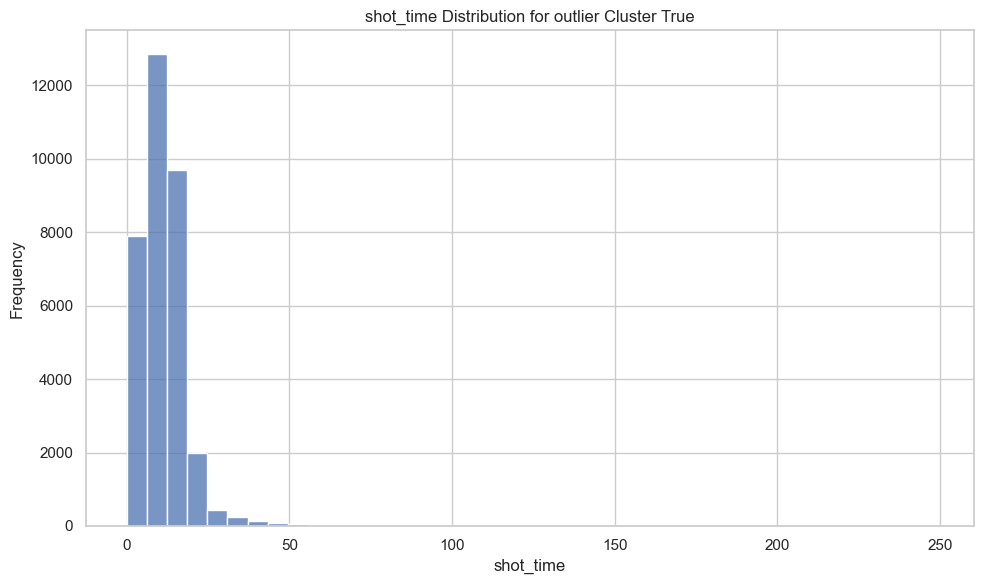

In [81]:

unique_clusters = df['outlier'].unique()
for cluster in unique_clusters:
    plt.figure(figsize=(10, 6))
    cluster_df = df[df['outlier'] == cluster]
    
    sns.histplot(data=cluster_df, x="shot_time", bins=40)
    
    plt.title(f'shot_time Distribution for outlier Cluster {cluster}')
    plt.ylabel('Frequency')
    plt.xlabel("shot_time")
    plt.tick_params(axis='x', rotation=0)
    
    # Show the histogram
    plt.tight_layout()
    plt.show()





# invistigate clusters

In [43]:
kmeans_c = []
hierarchical_c = []
for offense in list_offense:
    kmeans_c.append(offense.clusters_centroid_kmeans)
    hierarchical_c.append(offense.clusters_centroid_hierarchical)

In [44]:
kmeans_c_uniq = list(set(kmeans_c))
hierarchical_c_uniq = list(set(hierarchical_c))
print(kmeans_c_uniq)
print(hierarchical_c_uniq)


[200, 1761, 4061, 5575]
[1720, 2467]


In [45]:
kmeans_c_uniq_object = [list_offense[idx] for idx in kmeans_c_uniq]
hierarchical_c_uniq_object = [list_offense[idx] for idx in hierarchical_c_uniq]


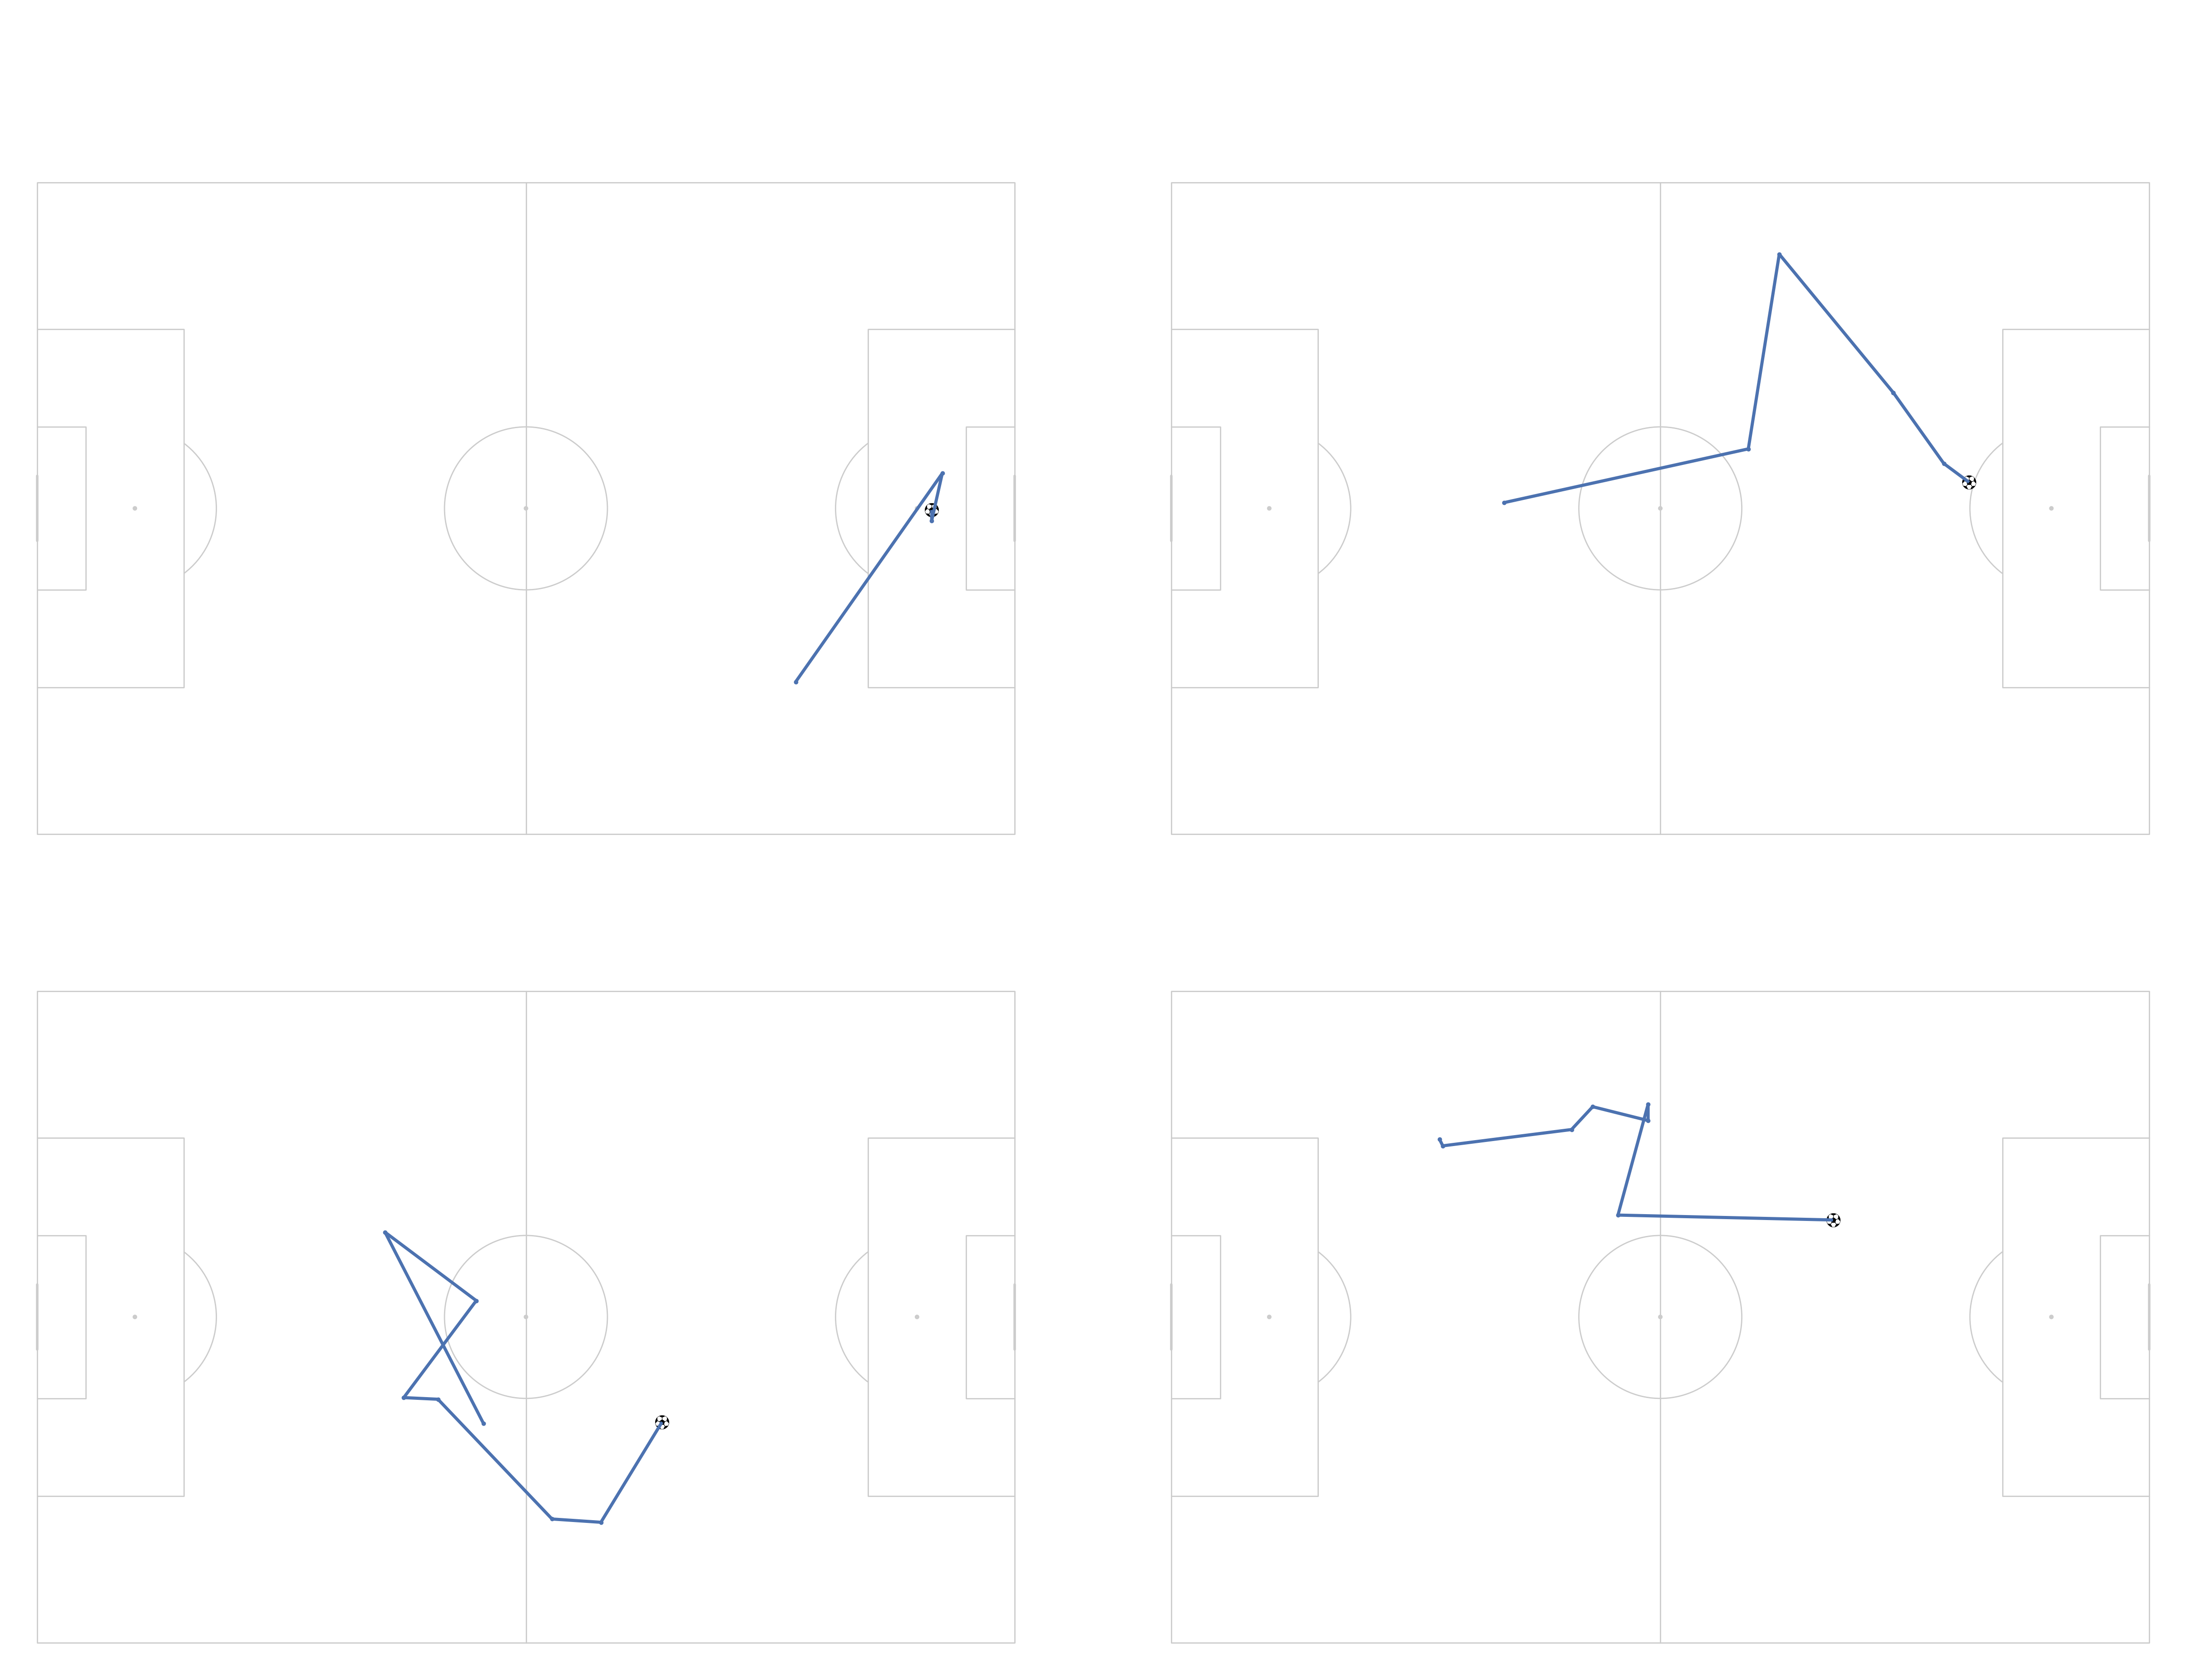

In [48]:
offense_grid(kmeans_c_uniq_object ,2, 2)

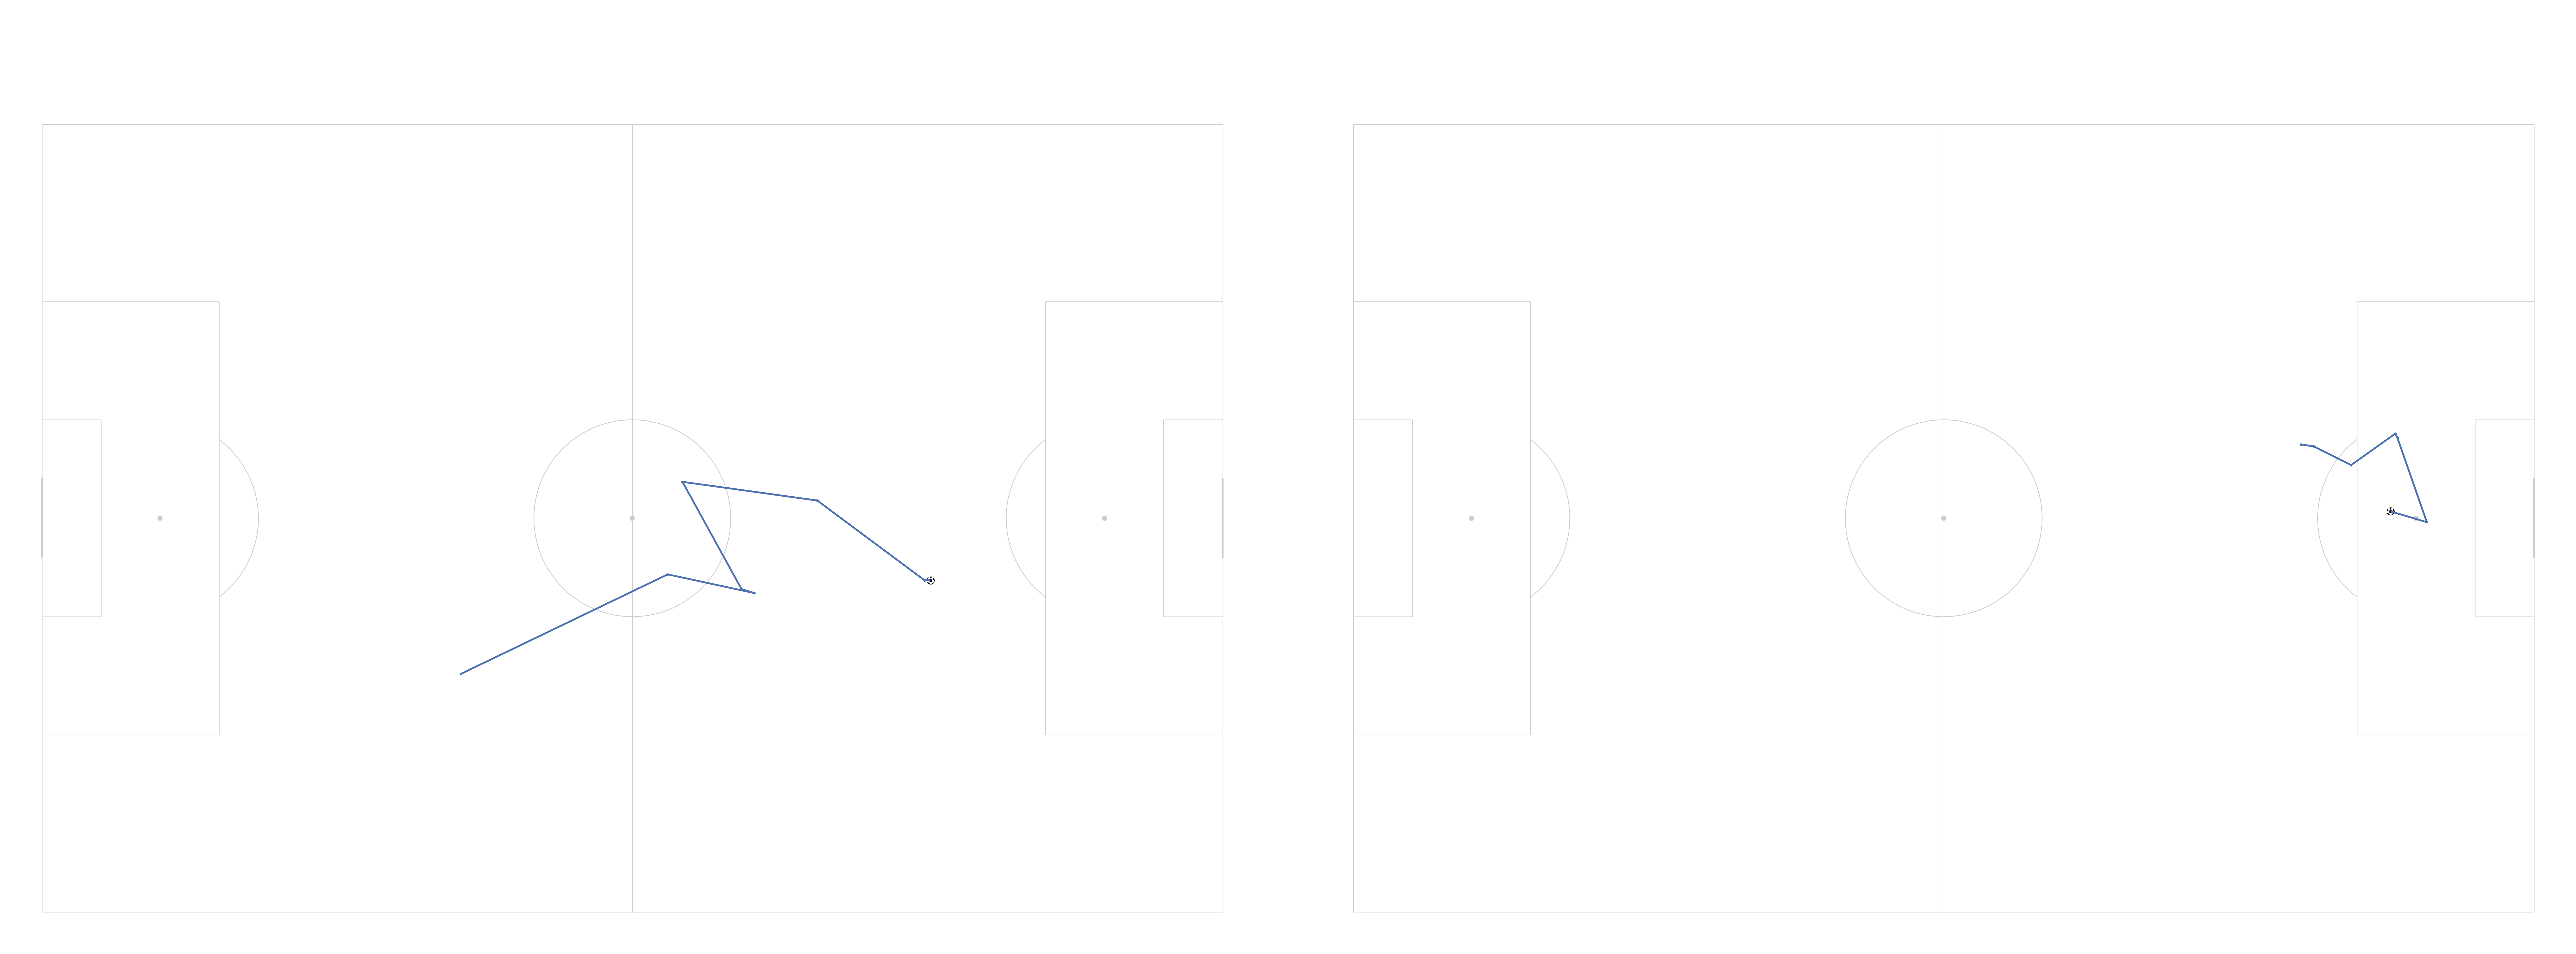

In [49]:
offense_grid(hierarchical_c_uniq_object ,1, 2)

In [83]:
data = []

# Iterate through the list of Offense objects and extract the desired statistics
for offense in list_offense:
    if offense.list_coords[-1][0] < 60:
        d= offense.list_coords[-1][0]
    else:
        d = 120 - offense.list_coords[-1][0]
    c =0 
    p = 0
    dribble = 0
    for a in offense.list_action_type:
        if a == "Carry":
            c +=1
        elif a == "Pass":
            p += 1
        elif a == "Dribble":
            dribble += 1
    if offense.list_time[-1] < 0:
        s_t = 0
    else:
        s_t = offense.list_time[-1]

    data.append({
        'play_pattern': offense.play_pattern,
        'end_location': offense.end_location,
        'outcome': offense.outcome,
        'len_offense': len(offense.list_coords),
        'shot_distance': d,
        "carry" : c ,
        "pass" : p,
        "dribble" : dribble,
        'shot_time': s_t,
        "kmeans" : offense.clusters_centroid_kmeans,
        "hierarchical" :offense.clusters_centroid_hierarchical
    })

# Create a DataFrame from the collected data
df = pd.DataFrame(data)

In [84]:
df.head(10)

,play_pattern,end_location,outcome,len_offense,shot_distance,carry,pass,dribble,shot_time,kmeans,hierarchical
0,Regular Play,"[120.0, 35.2, 1.0]",Off T,8,19.4,4,4,0,14,200,2467
1,From Throw In,"[120.0, 39.3, 0.5]",Goal,4,9.1,1,2,0,6,200,2467
2,From Throw In,"[118.1, 30.2]",Blocked,8,14.6,4,4,0,5,200,2467
3,From Counter,"[120.0, 39.0, 0.2]",Goal,8,18.2,4,2,1,22,1761,1720
4,Regular Play,"[118.8, 36.0, 0.2]",Saved,8,41.6,3,5,0,14,4061,1720
5,From Free Kick,"[117.1, 41.4, 2.0]",Saved,8,43.6,3,5,0,9,5575,1720
6,From Corner,"[120.0, 37.4, 3.5]",Off T,2,11.0,0,1,0,2,200,2467
7,From Free Kick,"[120.0, 27.3, 0.2]",Off T,8,39.6,3,5,0,10,4061,1720
8,From Goal Kick,"[120.0, 38.5, 0.2]",Goal,8,5.3,3,5,0,12,1761,1720
9,Regular Play,"[106.2, 26.6]",Blocked,8,16.3,4,3,0,11,1761,1720


In [85]:
df['is_goal'] = df['outcome'].apply(lambda x: 1 if x == 'Goal' else 0)


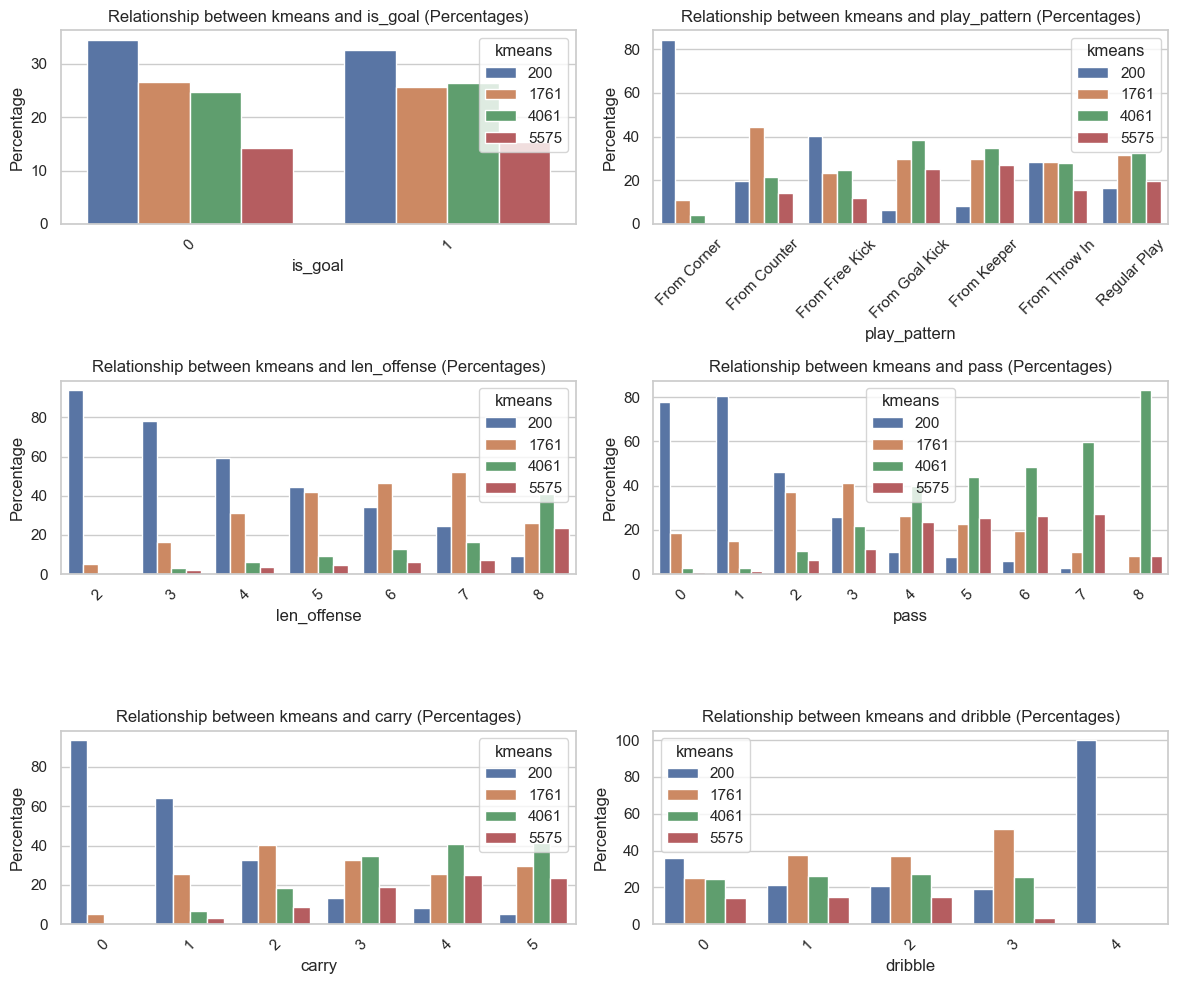

In [64]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

for c, s in zip(columns, spots):
    ct = pd.crosstab(df[c], df['kmeans'], normalize='index') * 100

    ct_reset = ct.reset_index()

    melted_ct = pd.melt(ct_reset, id_vars=c, value_vars=ct_reset.columns[1:], var_name='kmeans', value_name='Percentage')

    ax = axes[s[0], s[1]]
    sns.barplot(data=melted_ct, x=c, y='Percentage', hue='kmeans', ax=ax)

    ax.set_title(f'Relationship between kmeans and {c} (Percentages)')
    ax.set_xlabel(c)
    ax.set_ylabel('Percentage')
    for tick in axes[s[0], s[1]].get_xticklabels():
        tick.set_rotation(45)

    ax.legend(title='kmeans')

# Adjust layout
plt.tight_layout()
plt.show()

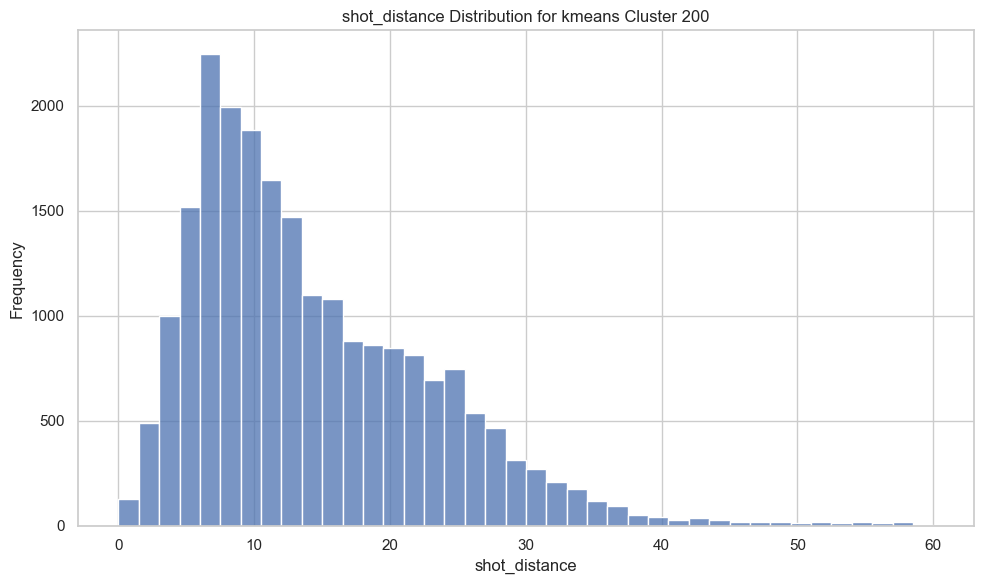

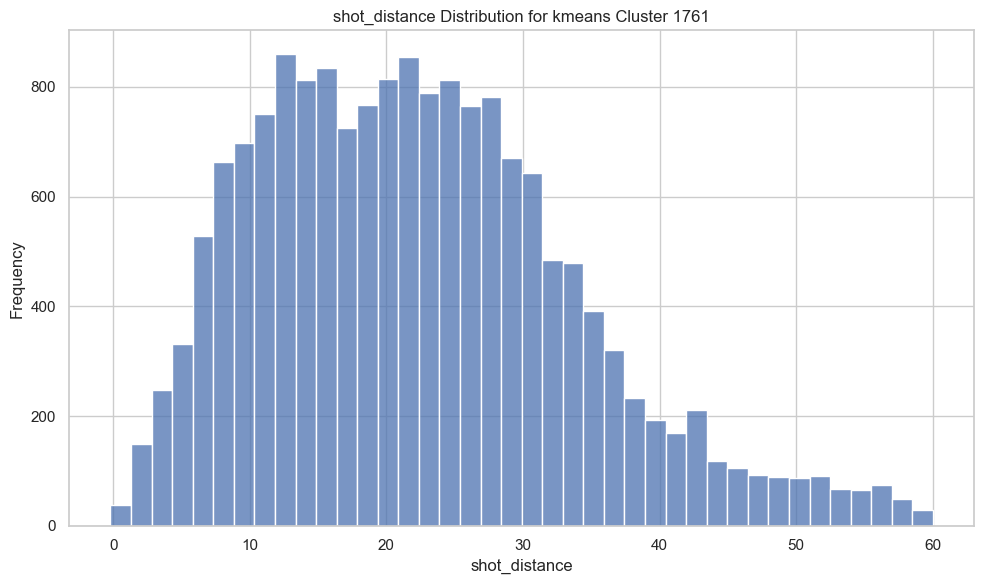

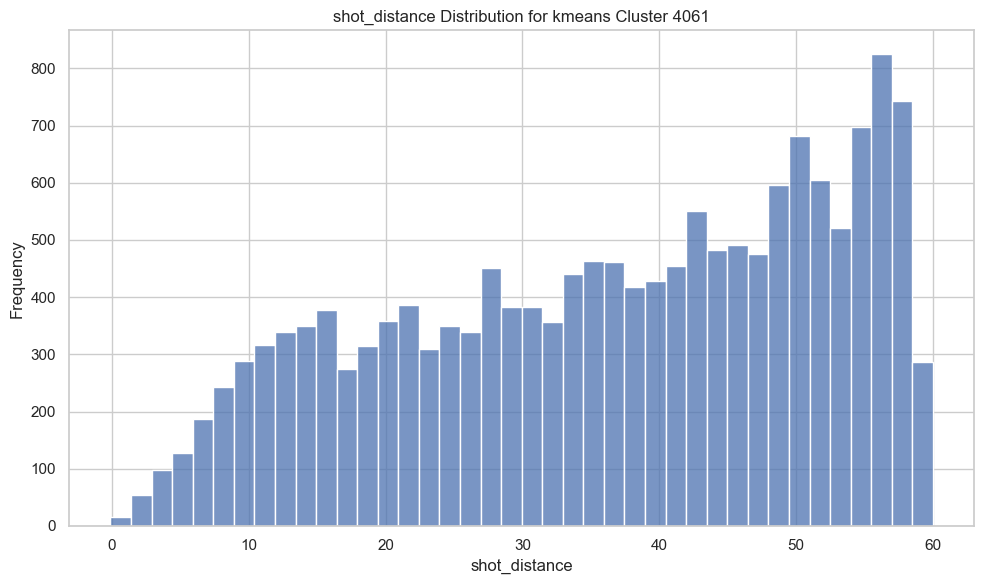

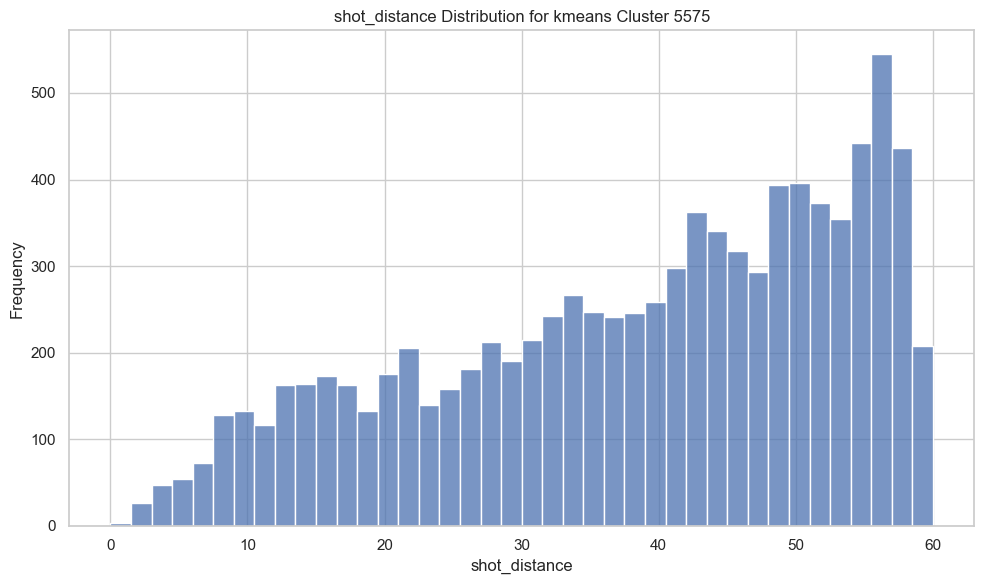

In [72]:



unique_clusters = df['kmeans'].unique()
for cluster in unique_clusters:
    plt.figure(figsize=(10, 6))
    cluster_df = df[df['kmeans'] == cluster]
    
    sns.histplot(data=cluster_df, x="shot_distance", bins=40)
    
    plt.title(f'shot_distance Distribution for kmeans Cluster {cluster}')
    plt.ylabel('Frequency')
    plt.xlabel("shot_distance")
    plt.tick_params(axis='x', rotation=0)
    
    # Show the histogram
    plt.tight_layout()
    plt.show()











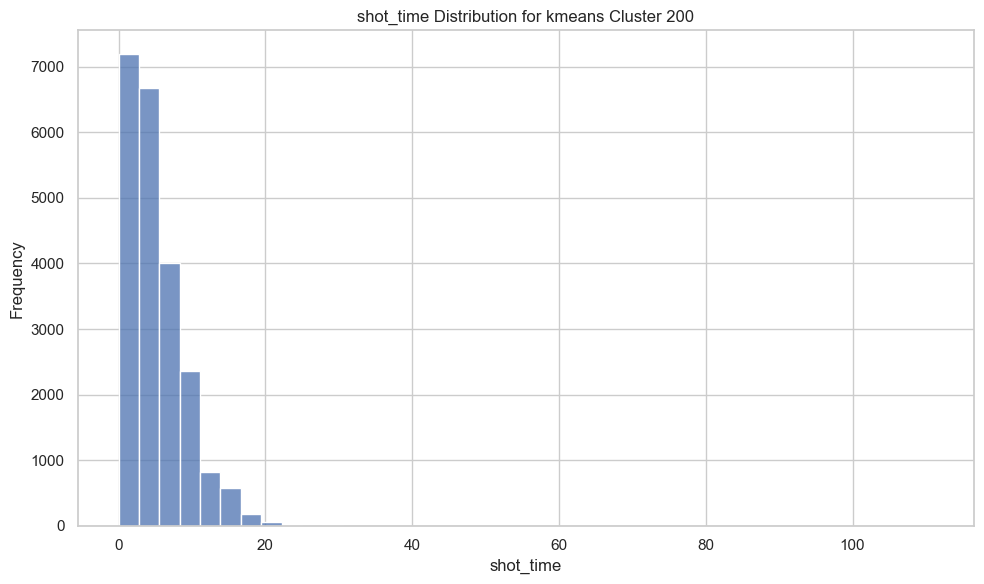

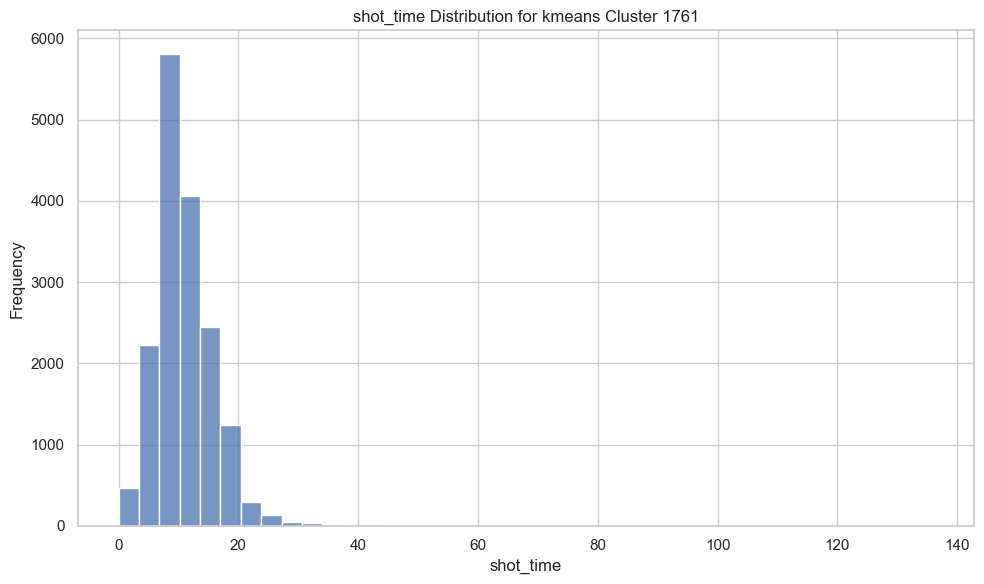

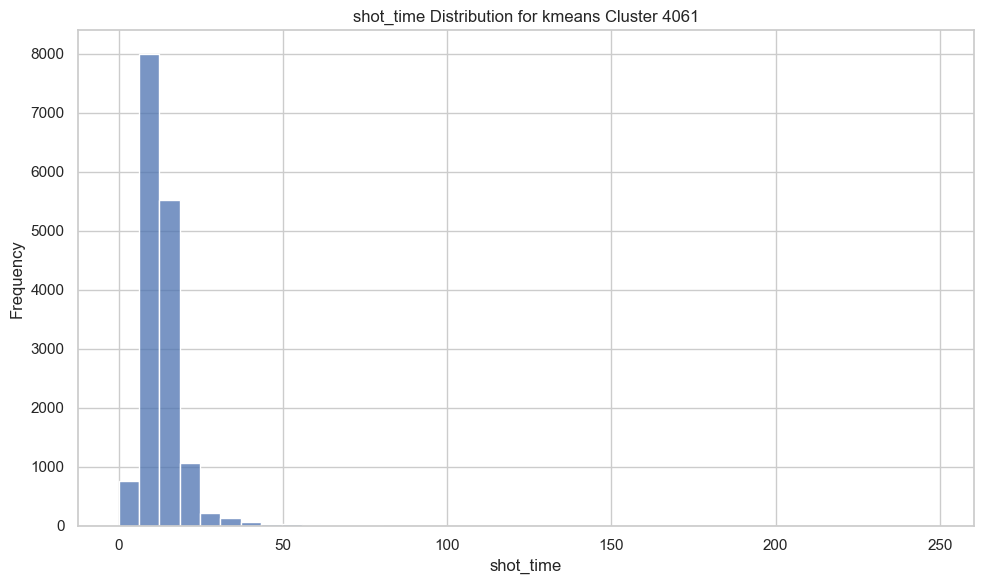

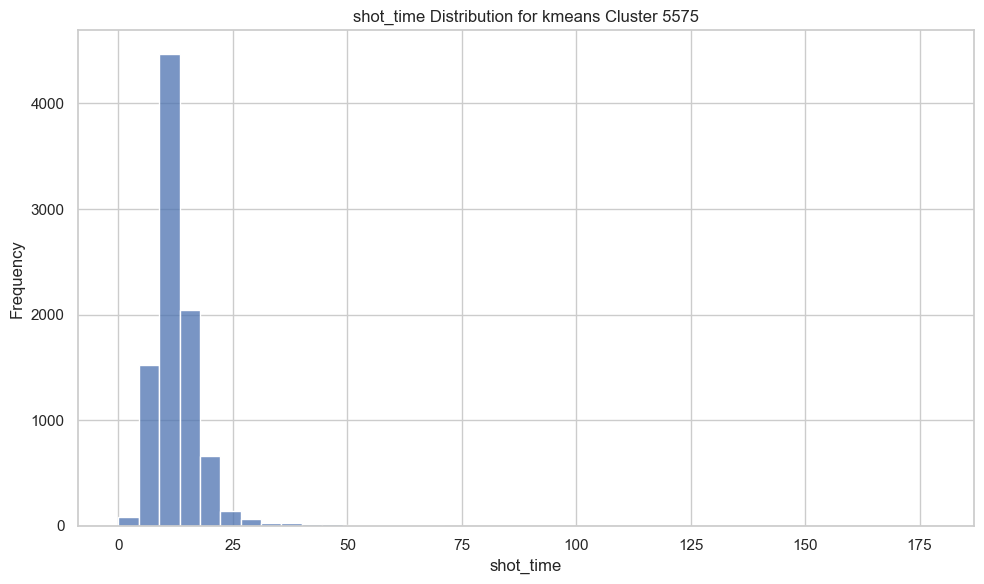

In [74]:

unique_clusters = df['kmeans'].unique()
for cluster in unique_clusters:
    plt.figure(figsize=(10, 6))
    cluster_df = df[df['kmeans'] == cluster]
    
    sns.histplot(data=cluster_df, x="shot_time", bins=40)
    
    plt.title(f'shot_time Distribution for kmeans Cluster {cluster}')
    plt.ylabel('Frequency')
    plt.xlabel("shot_time")
    plt.tick_params(axis='x', rotation=0)
    
    # Show the histogram
    plt.tight_layout()
    plt.show()


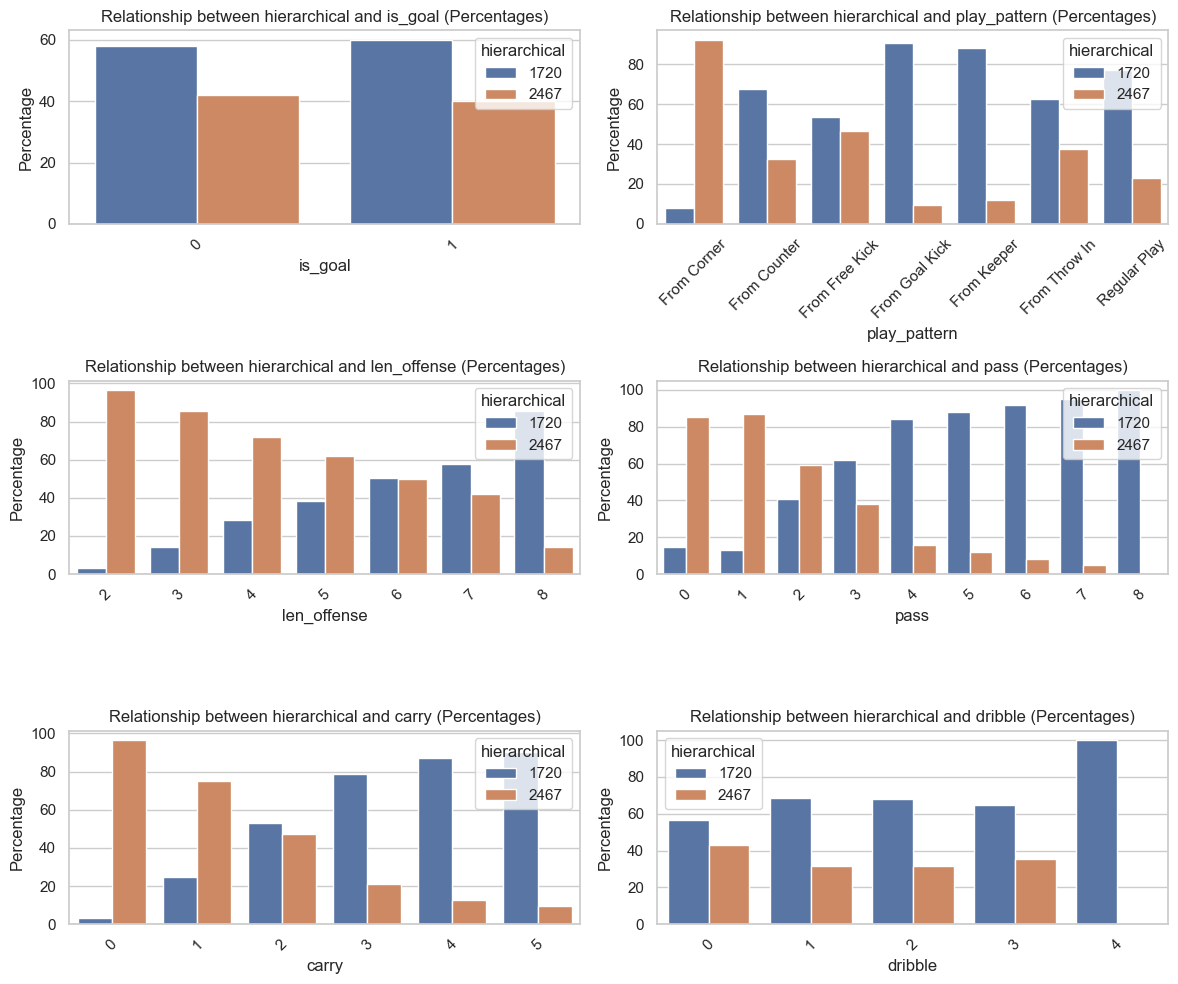

In [65]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

for c, s in zip(columns, spots):
    ct = pd.crosstab(df[c], df['hierarchical'], normalize='index') * 100

    ct_reset = ct.reset_index()

    melted_ct = pd.melt(ct_reset, id_vars=c, value_vars=ct_reset.columns[1:], var_name='hierarchical', value_name='Percentage')

    ax = axes[s[0], s[1]]
    sns.barplot(data=melted_ct, x=c, y='Percentage', hue='hierarchical', ax=ax)

    ax.set_title(f'Relationship between hierarchical and {c} (Percentages)')
    ax.set_xlabel(c)
    ax.set_ylabel('Percentage')
    for tick in axes[s[0], s[1]].get_xticklabels():
        tick.set_rotation(45)

    ax.legend(title='hierarchical')

# Adjust layout
plt.tight_layout()
plt.show()

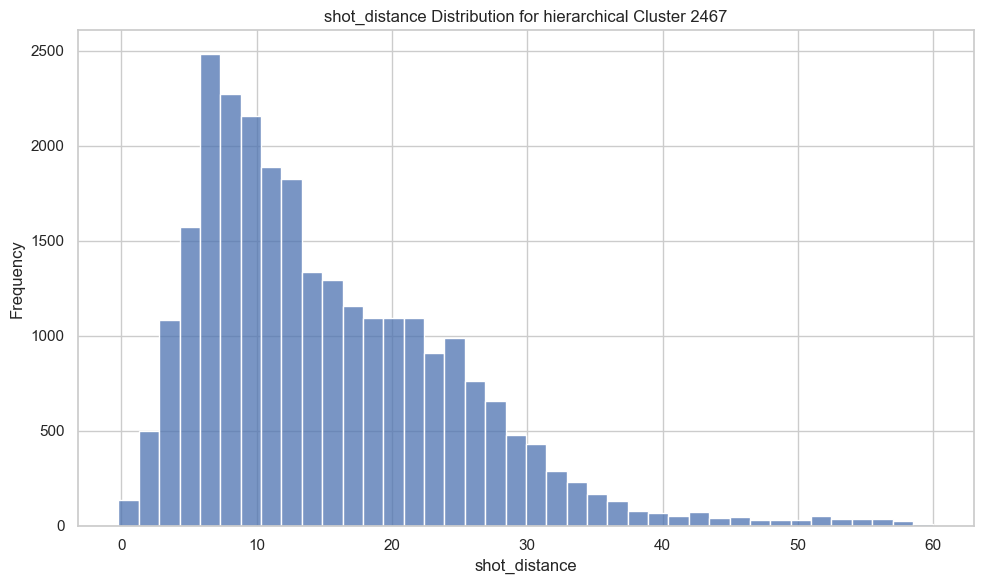

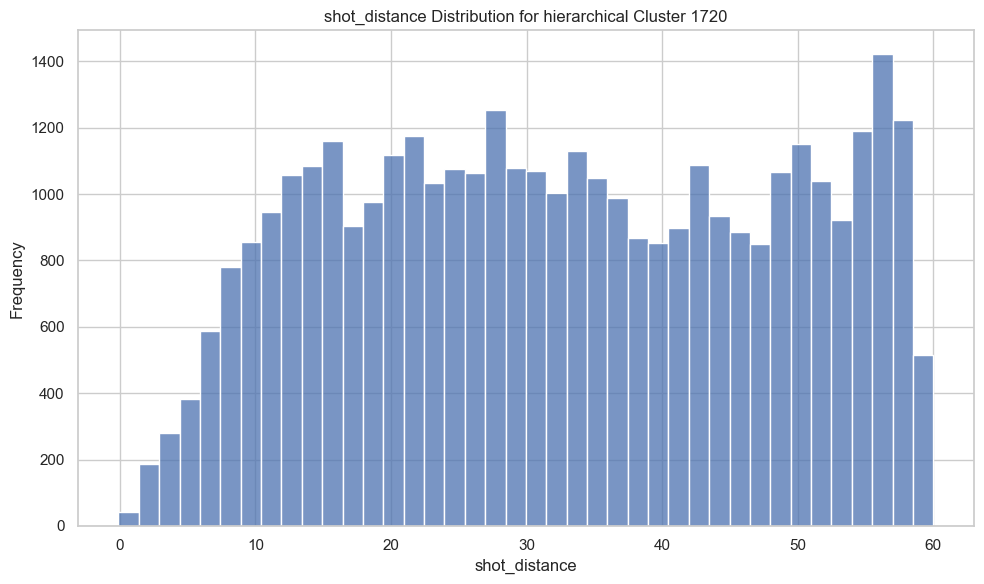

In [86]:



unique_clusters = df['hierarchical'].unique()
for cluster in unique_clusters:
    plt.figure(figsize=(10, 6))
    cluster_df = df[df['hierarchical'] == cluster]
    
    sns.histplot(data=cluster_df, x="shot_distance", bins=40)
    
    plt.title(f'shot_distance Distribution for hierarchical Cluster {cluster}')
    plt.ylabel('Frequency')
    plt.xlabel("shot_distance")
    plt.tick_params(axis='x', rotation=0)
    
    # Show the histogram
    plt.tight_layout()
    plt.show()











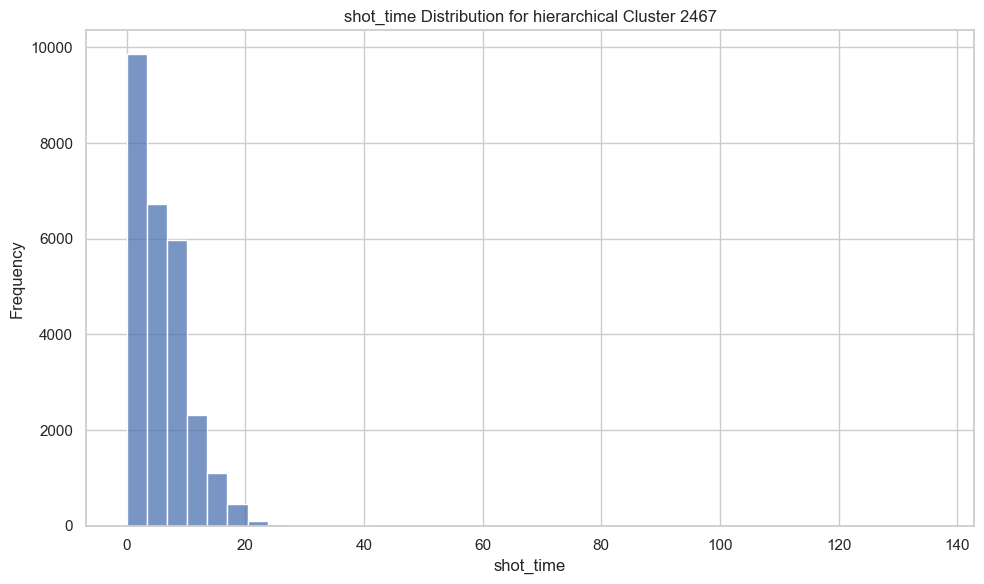

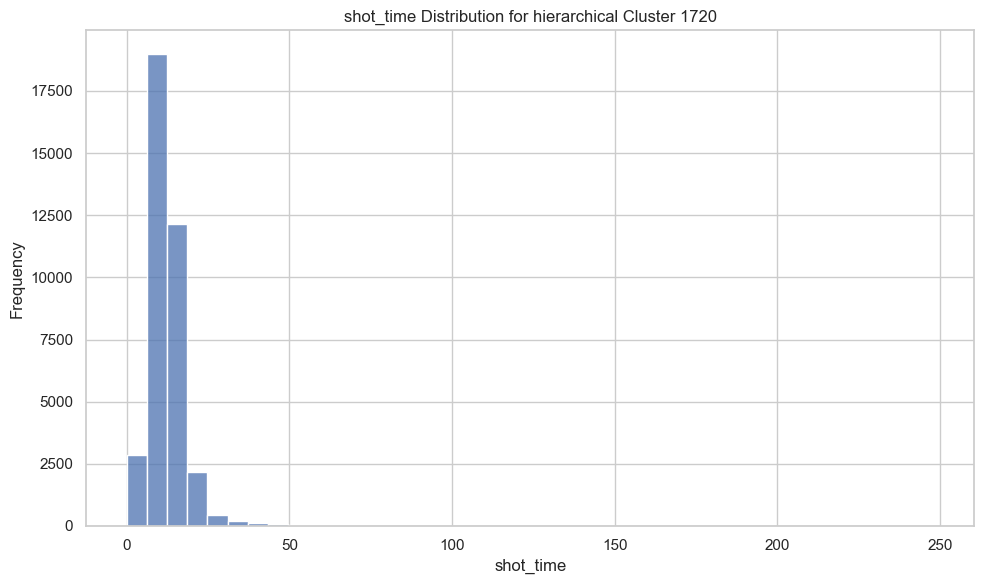

In [87]:

unique_clusters = df['hierarchical'].unique()
for cluster in unique_clusters:
    plt.figure(figsize=(10, 6))
    cluster_df = df[df['hierarchical'] == cluster]
    
    sns.histplot(data=cluster_df, x="shot_time", bins=40)
    
    plt.title(f'shot_time Distribution for hierarchical Cluster {cluster}')
    plt.ylabel('Frequency')
    plt.xlabel("shot_time")
    plt.tick_params(axis='x', rotation=0)
    
    # Show the histogram
    plt.tight_layout()
    plt.show()
